In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
import stats_functions
from itertools import combinations
'''
Using function now instead of writing things over and over again 
'''

'\nUsing function now instead of writing things over and over again \n'

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object_v2
importlib.reload(Subject_Object_v2)
importlib.reload(plot_functions)
importlib.reload(stats_functions)
import plot_functions as pf
import read_data_functions as rdf
import stats_functions as sf
import Statistics_Object
importlib.reload(Statistics_Object)


<module 'Statistics_Object' from 'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Statistics_Object.py'>

## Initial Thangs

In [3]:
experiment = 'Exp1'

In [4]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

if experiment == 'Exp1':
    tp3_title = "1000 [50]"
    tp4_title = "1000 [150]"
    tp5_title = '1100 [50]'
    tp6_title = "1100 [150]"
    tp7_title = "1200 [50]"
    tp8_title = '1200 [150]'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    xticklabel = 'Agent Movement Onset Time (ms)'
    num_blocks = len(trial_block_titles)
    num_trials = 80
    num_rows,num_cols = 2,3
    
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    xticklabel = 'Feedback Condition'
    num_trials = 80
    num_rows,num_cols = 2,2
    


## Pickle Objects

In [5]:
if 'subject_objects' not in locals():
    load_path = r'Subjects_Analyzed'
    subject_objects = rdf.pickle_subject_objects(figures_pull_list,load_path)
    # pos_group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
    #                                     reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')
    # pos_group.analyze_data()
    # vel_group_linear = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
    #                                     reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    # vel_group_linear.analyze_data()

    vel_group_thresh = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    vel_group_thresh.analyze_data()

Sub1
Sub2
Sub3
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17
Sub18
Sub19
Sub20


D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:564: RuntimeWarning: divide by zero encountered in divide
  self.mu_s = (self.phat_correct*self.mhat_correct - self.phat_error*self.mhat_error)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:575: RuntimeWarning: divide by zero encountered in divide
  self.mu_s_alternate = (self.phat_correct*self.mhat_correct_alternate - self.phat_error*self.mhat_error_alternate)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:499: RuntimeWarning: All-NaN slice encountered
  self.init_reach_posx_single_timepoint = np.nanmax(self.init_reach_posx*self.init_reach_pos_mask,axis=2)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:552: RuntimeWarning: Mean of empty slice


In [6]:
group = vel_group_thresh

## Set Save to True or False

In [7]:
save = False

## Create DataFrame for Pingouin

In [8]:
len(group.player_perc_wins.flatten().shape)

1

In [9]:
wins = group.player_perc_wins.flatten().tolist()
indecisions = group.player_perc_indecisions.flatten().tolist()
incorrects = group.player_perc_incorrects.flatten().tolist()
correct_decisions = group.phat_correct.flatten().tolist()
median_leave_time = np.nanmedian(group.player_task_leave_time,axis=2).flatten().tolist()
q1_median_leave_time = np.nanquantile(group.player_task_leave_time,0.25,axis=2).flatten().tolist()
q3_median_leave_time = np.nanquantile(group.player_task_leave_time,0.75,axis=2).flatten().tolist()
leave_time_sd = np.nanstd(group.player_task_leave_time,axis=2).flatten().tolist()
gamble_leave_time = np.nanmedian(group.player_gamble_task_leave_time,axis=2).flatten().tolist()
subject_number = np.repeat(np.arange(1,num_subjects+1,1,dtype=int),num_blocks).tolist()
condition = np.tile(np.arange(1,num_blocks+1,1,dtype=int),num_subjects).tolist()
# alt_condition = np.tile(['1000 (50)','1000 (150)','1100 (50)','1100 (150)', '1200 (50)', '1200 (150)'],num_subjects).tolist()
if experiment == 'Exp1':
    factor1 = np.tile(['1000','1000','1100','1100','1200','1200'],num_subjects) 
    factor2 = np.tile(['50','150'],num_subjects*3)
    
else:
    factor1 = np.tile(['0 Inc','-1 Inc','0 Inc','-1 Inc'],num_subjects) 
    factor2 = np.tile(['0 Ind','0 Ind','-1 Ind','-1 Ind'],num_subjects) 

    
df_metrics = pd.DataFrame(np.array([median_leave_time,wins,indecisions,incorrects,correct_decisions,gamble_leave_time,leave_time_sd,
                                    q1_median_leave_time,q3_median_leave_time]).T,
                        columns=['Median Leave Time','Wins','Indecisions','Incorrects','Correct Decisions','Median Gamble Leave Time','SD Leave Time',
                                 'Q1 Leave Time','Q3 Leave Time'])
df_conditions = pd.DataFrame(np.array([subject_number,condition,factor1,factor2]).T,columns = ['Subject','Condition','Factor 1','Factor 2'])
# df_metrics.astype('float64')

# df = df.astype({'Subject':'int32','Condition':'int32','Condition Mean':'int32','Condition SD':'int32'})
# dill.dump(df,open(save_path+'\\metrics_df_all_subjects.pkl','wb')) 
df = pd.concat([df_conditions,df_metrics],axis=1)
assert ~df.isnull().any(axis=1).any(),('NaN Values found in dataframe')
df.head(10)

,Subject,Condition,Factor 1,Factor 2,Median Leave Time,Wins,Indecisions,Incorrects,Correct Decisions,Median Gamble Leave Time,SD Leave Time,Q1 Leave Time,Q3 Leave Time
0,1,1,1000,50,1176.75,58.75,3.75,37.50,0.5000,1108.00,91.768280,1090.000,1214.250
1,1,2,1000,150,1179.75,70.00,17.50,12.50,0.6125,1171.00,106.088951,1091.750,1257.000
2,1,3,1100,50,1239.25,53.75,16.25,30.00,0.6250,1146.50,161.720012,1117.000,1322.375
3,1,4,1100,150,1140.50,53.75,5.00,41.25,0.4875,1140.50,122.741695,1069.500,1203.125
4,1,5,1200,50,1127.50,42.50,3.75,53.75,0.4625,1127.50,136.304558,1025.250,1203.250
5,1,6,1200,150,1238.25,55.00,18.75,26.25,0.4375,1224.75,93.511336,1178.250,1315.500
6,2,1,1000,50,1261.25,90.00,1.25,8.75,0.9000,1131.50,67.245920,1219.375,1288.750
7,2,2,1000,150,1239.25,86.25,8.75,5.00,0.9250,1287.00,95.203261,1195.125,1300.750
8,2,3,1100,50,1332.75,53.75,20.00,26.25,0.6375,1276.50,64.488029,1278.000,1364.500
9,2,4,1100,150,1236.00,65.00,16.25,18.75,0.7125,1210.00,94.061681,1195.375,1305.250


## Initialize bootstrap

In [10]:
stats_object = Statistics_Object.Statistics(df, experiment = experiment, num_subjects=num_subjects,num_blocks=num_blocks,num_trials=num_trials)

In [11]:
a = au.bootstrap([0,1,2],[0,1,2],paired=True,M=1e4) # Just initializing bootstrap

## Median Leave Times

In [12]:
median_leave_time_anova,median_leave_time_statistics = stats_object.run_statistics('Median Leave Time')
median_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,62610.532292,2,38,31305.266146,4.524347,0.017278,0.026861,0.030822,0.778095
1,Factor 2,72410.250521,1,19,72410.250521,7.104544,0.015286,0.015286,0.035475,1.000000
2,Factor 1 * Factor 2,2883.969792,2,38,1441.984896,0.523621,0.596584,0.569516,0.001463,0.855641


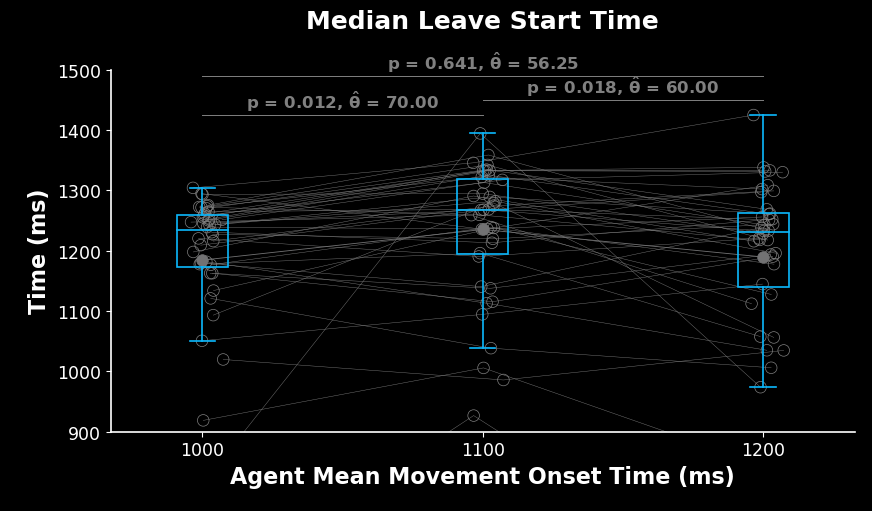

In [33]:
metric = stats_object.collapse_across(np.nanmedian(group.player_task_leave_time,axis=2),combos=['01','23','45'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1425,p_val=median_leave_time_statistics[0]['01'],cles=median_leave_time_statistics[1]['01'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[1],xlocs[2],1450,p_val=median_leave_time_statistics[0]['12'],cles=median_leave_time_statistics[1]['12'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[0],xlocs[2],1490,p_val=median_leave_time_statistics[0]['02'],cles=median_leave_time_statistics[1]['02'],fontsize=12,h=3)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time', pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

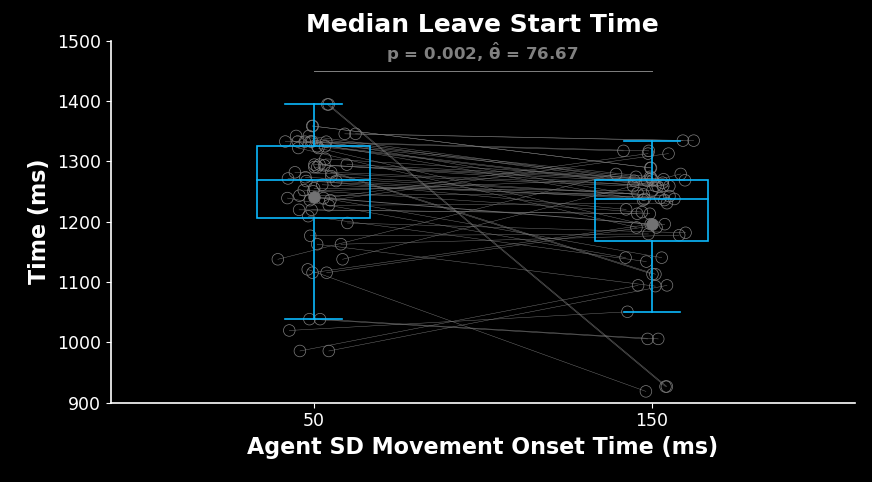

In [14]:
metric = sf.collapse_across(np.nanmedian(group.player_task_leave_time,axis=2),combos=['024','135'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=median_leave_time_statistics[2]['01'],cles=median_leave_time_statistics[3]['01'], fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## SD Leave Times

In [15]:
sd_leave_time_anova,sd_leave_time_statistics = sf.run_statistics(df, dependent_variable_name='SD Leave Time',
                                     arr = np.nanstd(group.player_task_leave_time,axis=2),alternative = 'two-sided')
sd_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,13861.394875,2,38,6930.697437,5.528077,0.007811,0.020151,0.037009,0.644280
1,Factor 2,12855.434911,1,19,12855.434911,18.385816,0.000397,0.000397,0.034416,1.000000
2,Factor 1 * Factor 2,6138.760226,2,38,3069.380113,2.997064,0.061857,0.069275,0.016735,0.883783


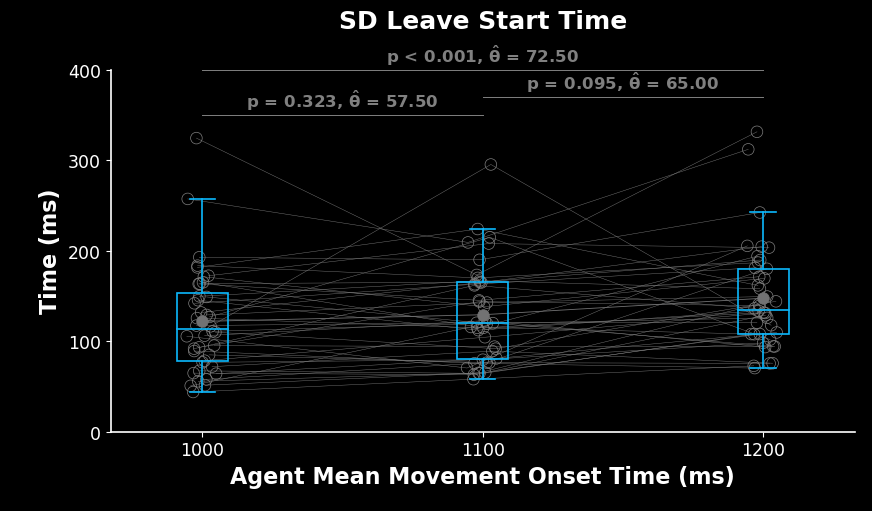

In [16]:
metric = sf.collapse_across(np.nanstd(group.player_task_leave_time,axis=2),combos=['01','23','45'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(0,500,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],350,p_val=sd_leave_time_statistics[0]['01'],cles=sd_leave_time_statistics[1]['01'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[1],xlocs[2],370,p_val=sd_leave_time_statistics[0]['12'],cles=sd_leave_time_statistics[1]['12'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[0],xlocs[2],400,p_val=sd_leave_time_statistics[0]['02'],cles=sd_leave_time_statistics[1]['02'],fontsize=12,h=3)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('SD Leave Start Time', pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

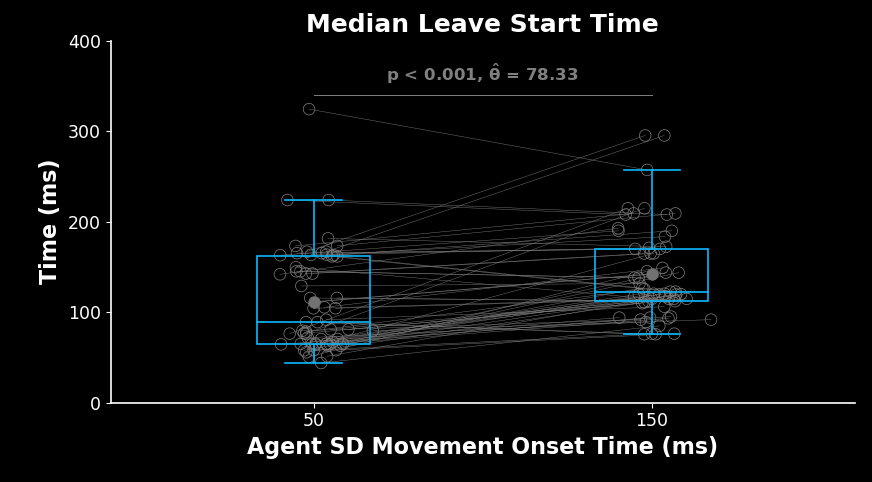

In [17]:
metric = sf.collapse_across(np.nanstd(group.player_task_leave_time,axis=2),combos=['024','135'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(0,500,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],340,h = 10,p_val=sd_leave_time_statistics[2]['01'],cles=sd_leave_time_statistics[3]['01'], fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## First Quartile Leave Time

In [18]:
q1_leave_time_anova,q1_leave_time_statistics = sf.run_statistics(df, dependent_variable_name='Q1 Leave Time',
                                     arr = np.quantile(group.player_task_leave_time,0.25,axis=2))
q1_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,85627.282031,2,38,42813.641016,3.767695,0.032156,0.050501,0.028117,0.695513
1,Factor 2,111028.437630,1,19,111028.437630,13.200853,0.001769,0.001769,0.036156,1.000000
2,Factor 1 * Factor 2,703.134635,2,38,351.567318,0.078371,0.924770,0.892870,0.000238,0.826418


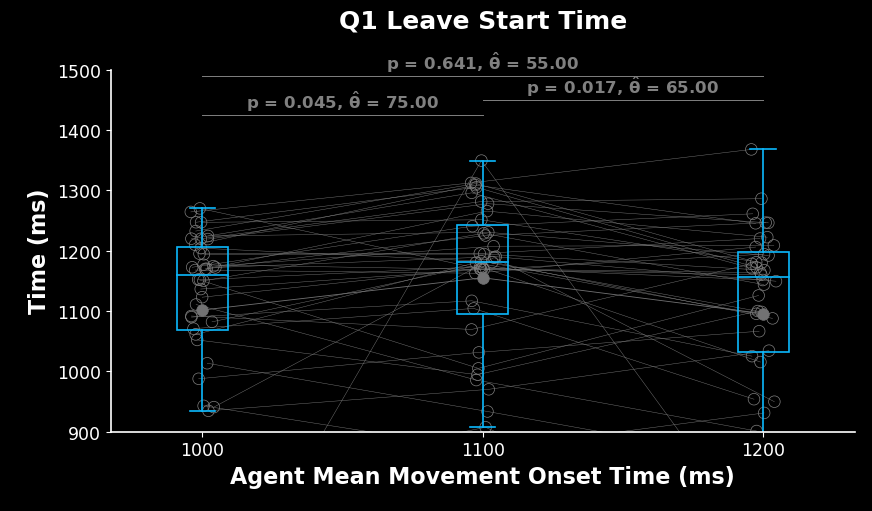

In [19]:
metric = sf.collapse_across(np.quantile(group.player_task_leave_time,0.25,axis=2),combos=['01','23','45'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1425,p_val=q1_leave_time_statistics[0]['01'],cles=q1_leave_time_statistics[1]['01'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[1],xlocs[2],1450,p_val=q1_leave_time_statistics[0]['12'],cles=q1_leave_time_statistics[1]['12'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[0],xlocs[2],1490,p_val=q1_leave_time_statistics[0]['02'],cles=q1_leave_time_statistics[1]['02'],fontsize=12,h=3)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Q1 Leave Start Time', pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'q1_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

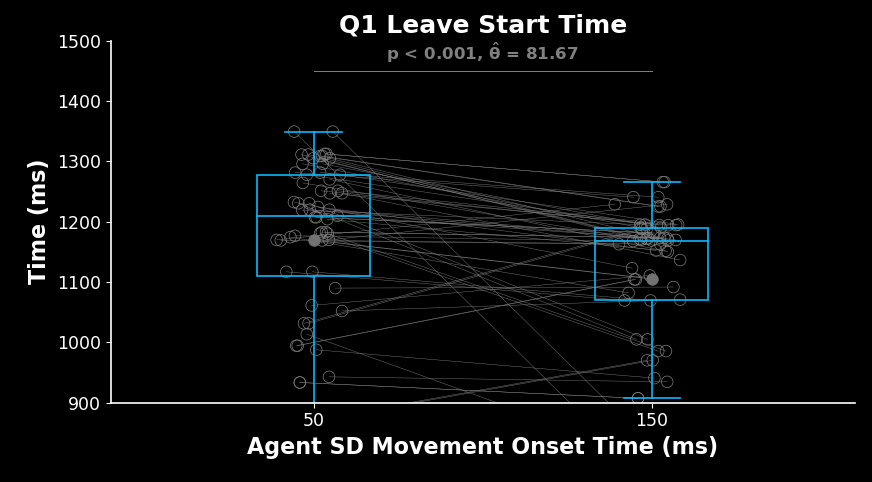

In [20]:
metric = sf.collapse_across(np.quantile(group.player_task_leave_time,0.25,axis=2),combos=['024','135'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=q1_leave_time_statistics[2]['01'],cles=q1_leave_time_statistics[3]['01'], fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Q1 Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'q1_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Third Quartile Leave Time

In [21]:
q3_leave_time_anova,q3_leave_time_statistics = sf.run_statistics(df, dependent_variable_name='Q3 Leave Time',
                                     arr = np.quantile(group.player_task_leave_time,0.75,axis=2))
q3_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,54554.378385,2,38,27277.189193,6.547273,0.003604,0.005466,0.042232,0.874529
1,Factor 2,32238.310547,1,19,32238.310547,3.651891,0.071212,0.071212,0.025395,1.000000
2,Factor 1 * Factor 2,13148.977344,2,38,6574.488672,3.021272,0.060578,0.068492,0.010516,0.875995


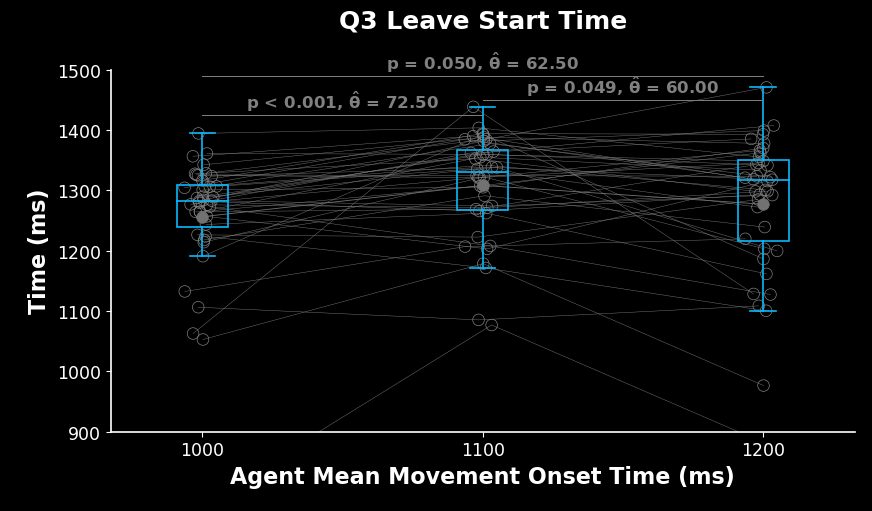

In [22]:
metric = sf.collapse_across(np.quantile(group.player_task_leave_time,0.75,axis=2),combos=['01','23','45'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1425,p_val=q3_leave_time_statistics[0]['01'],cles=q3_leave_time_statistics[1]['01'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[1],xlocs[2],1450,p_val=q3_leave_time_statistics[0]['12'],cles=q3_leave_time_statistics[1]['12'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[0],xlocs[2],1490,p_val=q3_leave_time_statistics[0]['02'],cles=q3_leave_time_statistics[1]['02'],fontsize=12,h=3)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Q3 Leave Start Time', pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'q3_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

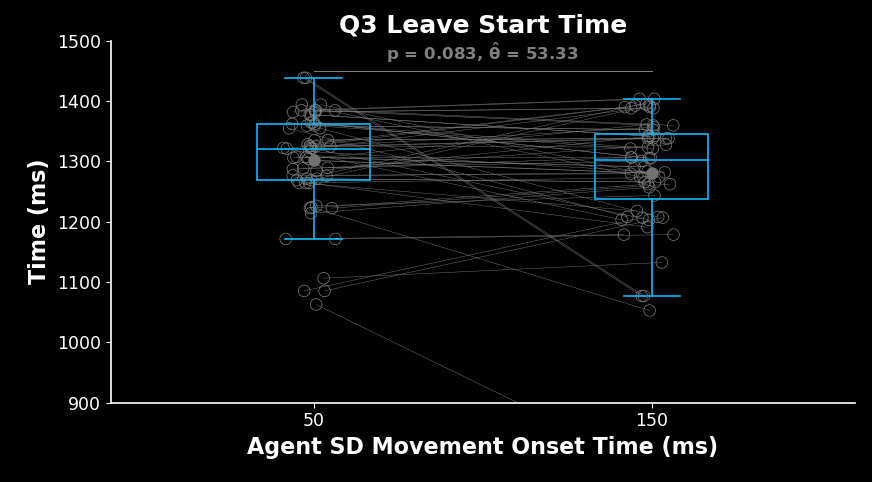

In [23]:
metric = sf.collapse_across(np.quantile(group.player_task_leave_time,0.75,axis=2),combos=['024','135'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=q3_leave_time_statistics[2]['01'],cles=q3_leave_time_statistics[3]['01'], fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Q3 Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'q3_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Correct Decisions (Doesn't matter if indecision)

In [24]:
corrects_anova,corrects_statistics = sf.run_statistics(df, dependent_variable_name='Correct Decisions',
                                     arr = group.phat_correct,alternative = 'two-sided')
corrects_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,1.456273,2,38,0.728137,63.398219,7.832127e-13,3.543290e-10,0.477982,0.75166
1,Factor 2,0.055255,1,19,0.055255,10.454385,4.374570e-03,4.374570e-03,0.033576,1.00000
2,Factor 1 * Factor 2,0.002299,2,38,0.001150,0.194455,8.240973e-01,7.825386e-01,0.001444,0.82528


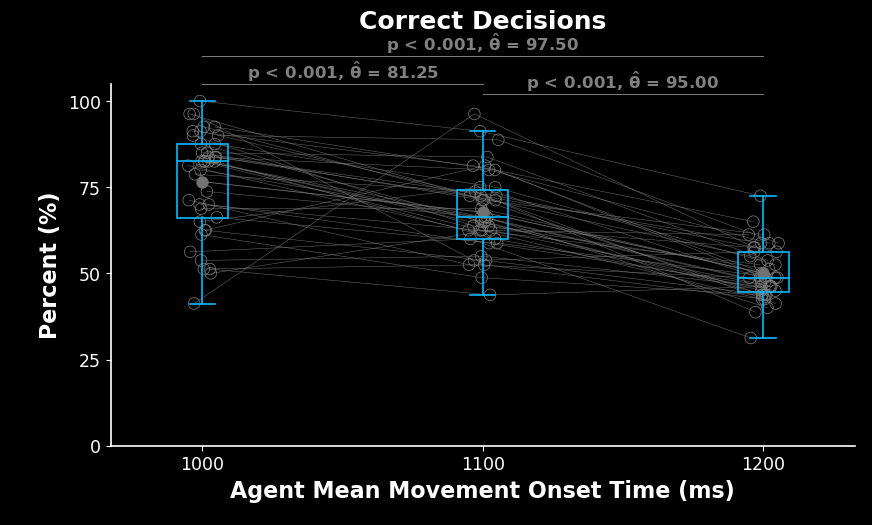

In [25]:
metric = sf.collapse_across(group.phat_correct*100,combos=['01','23','45'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(0,125,25)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],105,p_val=corrects_statistics[0]['01'],cles=corrects_statistics[1]['01'],fontsize=12,h=0.2)
dv.stat_annotation(ax,xlocs[1],xlocs[2],102,p_val=corrects_statistics[0]['12'],cles=corrects_statistics[1]['12'],fontsize=12,h=0.2)
dv.stat_annotation(ax,xlocs[0],xlocs[2],113,p_val=corrects_statistics[0]['02'],cles=corrects_statistics[1]['02'],fontsize=12,h=0.2)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+5)

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Correct Decisions', pad=40)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

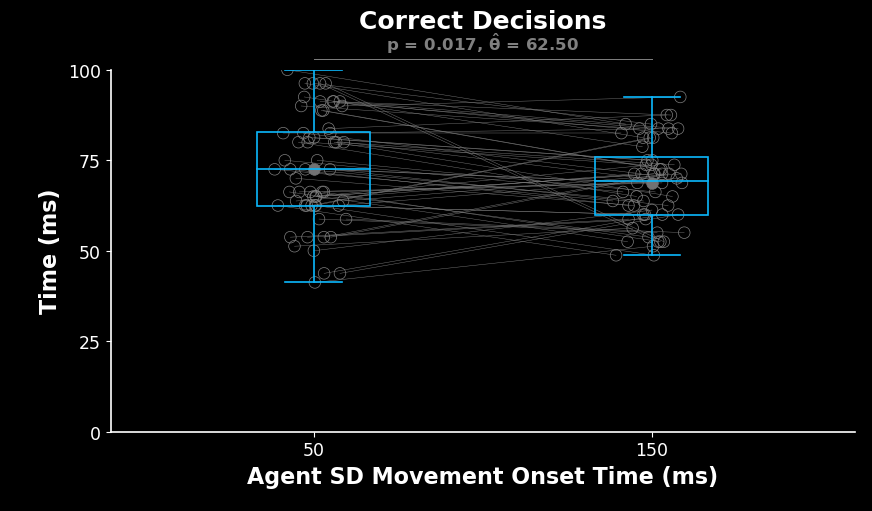

In [26]:
metric = sf.collapse_across(group.phat_correct*100,combos=['024','135'])
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(0,125,25)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],103,p_val=corrects_statistics[2]['01'],cles=corrects_statistics[3]['01'],h = 1, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Correct Decisions',pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Wins

In [27]:
wins_anova,wins_statistics = sf.run_statistics(df, dependent_variable_name='Wins',
                                     arr = group.player_perc_wins, alternative = 'two-sided')
wins_anova

Significant interaction, doing pairwise bootstraps for each condition...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,13373.671875,2,38,6686.835938,51.777019,1.407231e-11,2.670757e-09,0.501585,0.759118
1,Factor 2,579.700521,1,19,579.700521,8.951407,7.495068e-03,7.495068e-03,0.041799,1.000000
2,Factor 1 * Factor 2,2636.119792,2,38,1318.059896,23.729079,2.053863e-07,3.546155e-06,0.165531,0.770944


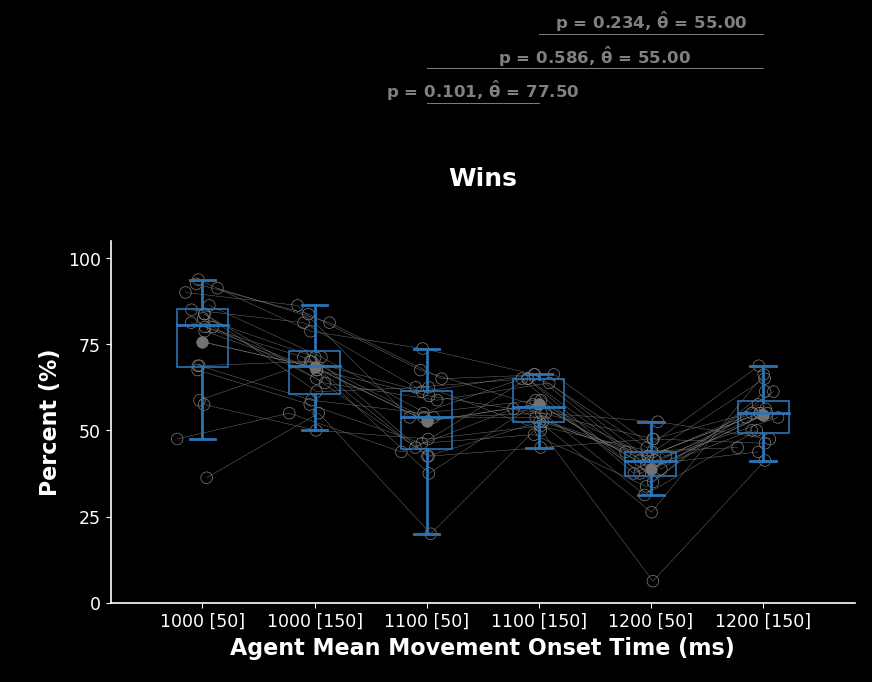

In [28]:
metric = group.player_perc_wins
combos = ["".join(map(str, comb)) for comb in combinations(['0','1','2','3','4','5'], 2)]
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)
bw = 1
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
# dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
# dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
# dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
ypos_annotation = 100
mean_flag = True
c=0
for combo in combos:
    a = int(combo[0])
    b = int(combo[1])
    if wins_statistics[0][combo]>0.1: 
        c+=1
        dv.stat_annotation(ax,xlocs[a],xlocs[b],ypos_annotation,p_val=wins_statistics[0][combo],cles=wins_statistics[1][combo],fontsize=12,h=0.2)
    ypos_annotation +=5
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+5)

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Wins', pad=40)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Incorrects

In [29]:
incorrects_anova,incorrects_statistics = sf.run_statistics(df, dependent_variable_name='Incorrects',
                                     arr = group.player_perc_incorrects, alternative = 'two-sided')
incorrects_anova

Significant interaction, doing pairwise bootstraps for each condition...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,5953.854167,2,38,2976.927083,29.795407,1.648612e-08,1.588739e-07,0.246655,0.847537
1,Factor 2,157.552083,1,19,157.552083,2.522493,1.287353e-01,1.287353e-01,0.008590,1.000000
2,Factor 1 * Factor 2,556.354167,2,38,278.177083,3.722088,3.340427e-02,4.280908e-02,0.029687,0.829146


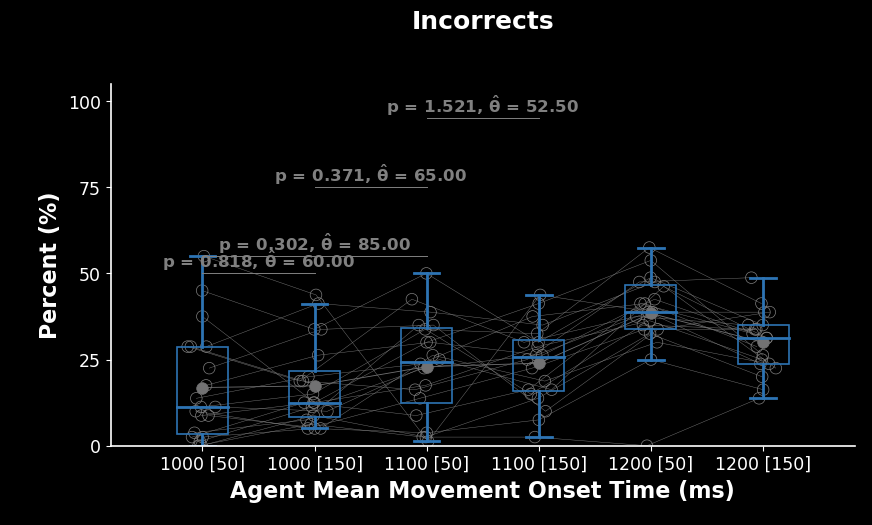

In [30]:
metric = group.player_perc_incorrects
combos = ["".join(map(str, comb)) for comb in combinations(['0','1','2','3','4','5'], 2)]
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)
bw = 1
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
# dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
# dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
# dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
ypos_annotation = 50
mean_flag = True
c=0
for combo in combos:
    a = int(combo[0])
    b = int(combo[1])
    if incorrects_statistics[0][combo]>0.1: 
        c+=1
        dv.stat_annotation(ax,xlocs[a],xlocs[b],ypos_annotation,p_val=incorrects_statistics[0][combo],cles=incorrects_statistics[1][combo],fontsize=12,h=0.2)
    ypos_annotation +=5
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+5)

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Incorrects', pad=40)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Indecisions

In [31]:
indecisions_anova,indecisions_statistics = sf.run_statistics(df, dependent_variable_name='Indecisions',
                                     arr = group.player_perc_indecisions, alternative = 'two-sided')
indecisions_anova

Significant interaction, doing pairwise bootstraps for each condition...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,2481.432292,2,38,1240.716146,10.003995,0.000323,0.000528,0.111388,0.910429
1,Factor 2,132.825521,1,19,132.825521,1.017642,0.325754,0.325754,0.006665,1.000000
2,Factor 1 * Factor 2,1216.432292,2,38,608.216146,5.577994,0.007515,0.013381,0.057891,0.785547


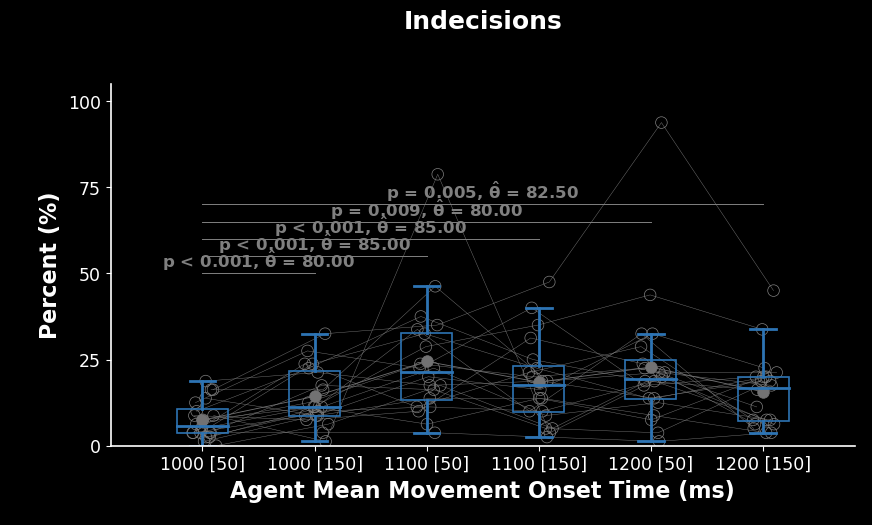

In [32]:
metric = group.player_perc_indecisions
combos = ["".join(map(str, comb)) for comb in combinations(['0','1','2','3','4','5'], 2)]
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)
bw = 1
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
# dv.boxplot(ax,xlocs[0],metric[:,0],box_width=bw)
# dv.boxplot(ax,xlocs[1],metric[:,1],box_width=bw)
# dv.boxplot(ax,xlocs[2],metric[:,2],box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
ypos_annotation = 50
mean_flag = True
c=0
for combo in combos:
    a = int(combo[0])
    b = int(combo[1])
    if indecisions_statistics[0][combo]<0.08: 
        c+=1
        dv.stat_annotation(ax,xlocs[a],xlocs[b],ypos_annotation,p_val=indecisions_statistics[0][combo],cles=indecisions_statistics[1][combo],fontsize=12,h=0.2)
    ypos_annotation +=5
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+5)

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Indecisions', pad=40)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()